In [1]:
import numpy as np
import opt_mo
import random


In [2]:
import tqdm


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

**Examples without the cycle check**

In [5]:
best_ev_responses, histories = [], []
for seed in tqdm.tqdm(range(5)):
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

    best_ev_response, hist = opt_mo.find_evolutionary_best_response(
        random_opponents, opt_mo.memory_one_best_response
    )
    best_ev_responses.append(best_ev_response), histories.append(hist)


 40%|████      | 2/5 [00:46<01:11, 23.90s/it]

Note history is at: 10 iterations.
Note history is at: 20 iterations.


 60%|██████    | 3/5 [03:06<01:57, 58.70s/it]/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
100%|██████████| 5/5 [03:57<00:00, 41.21s/it]


**seed $\in [0, 1]$ converge**

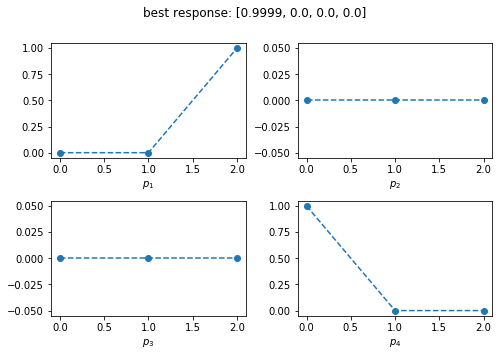

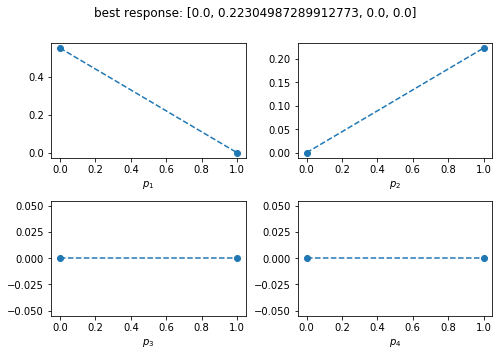

In [35]:
for hist, best in zip(histories[:2], best_ev_responses):
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    fig.suptitle("best response: {}".format(best))
    for i in range(4):
        ax[int(i / 2), i % 2].plot(points[i], linestyle="--", marker="o")
        ax[int(i / 2), i % 2].set_xlabel(r"$p_{}$".format(i + 1))
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)


**seed $\in [2]$ hits cycle**

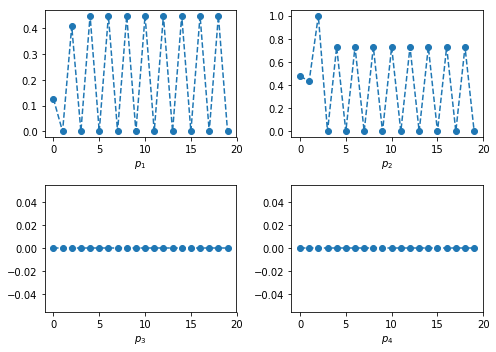

In [36]:
for hist in histories[2:3]:
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))

    for i in range(4):
        ax[int(i / 2), i % 2].plot(points[i], linestyle="--", marker="o")
        ax[int(i / 2), i % 2].set_xlabel(r"$p_{}$".format(i + 1))
    fig.tight_layout()


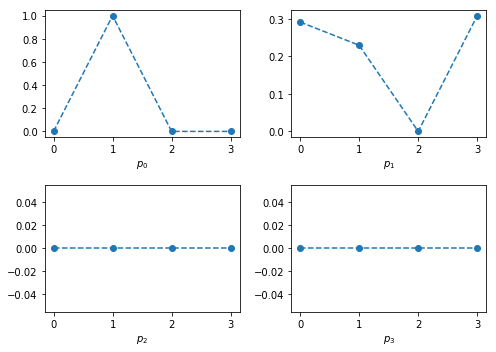

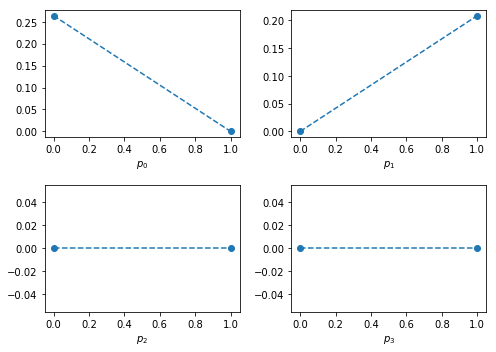

In [26]:
for hist in histories[3:5]:
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))

    for i in range(4):
        ax[int(i / 2), i % 2].plot(
            points[i], linestyle="--", marker="o", label=r"$p_{}$".format(i)
        )
        ax[int(i / 2), i % 2].set_xlabel(r"$p_{}$".format(i))
    fig.tight_layout()


where did the `scopt` warning appear: `axl.seed(3)` it means that bayesian has converge: https://github.com/scikit-optimize/scikit-optimize/issues/441

**More examples before the cycle check** last case is in a cycle

In [30]:
best_ev_responses_two, histories_two = [], []
for seed in tqdm.tqdm(range(5, 10)):
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

    best_ev_response, hist = opt_mo.find_evolutionary_best_response(
        random_opponents, opt_mo.memory_one_best_response
    )
    best_ev_responses_two.append(best_ev_response), histories_two.append(hist)


 80%|████████  | 4/5 [01:26<00:21, 21.15s/it]

Note history is at: 10 iterations.
Note history is at: 20 iterations.


100%|██████████| 5/5 [03:45<00:00, 56.71s/it]


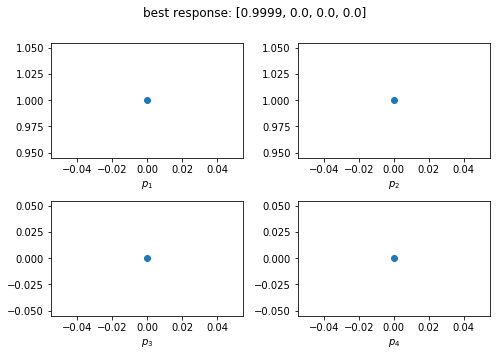

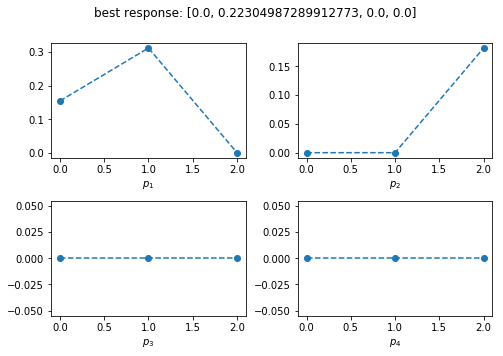

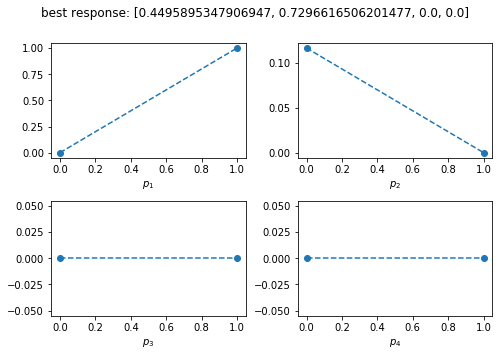

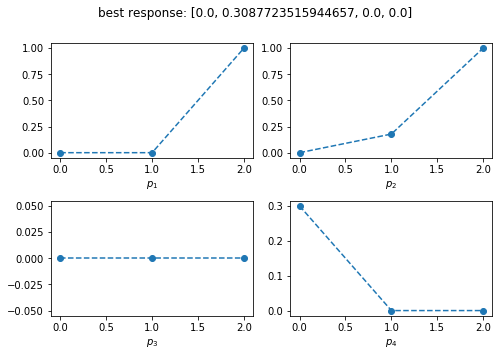

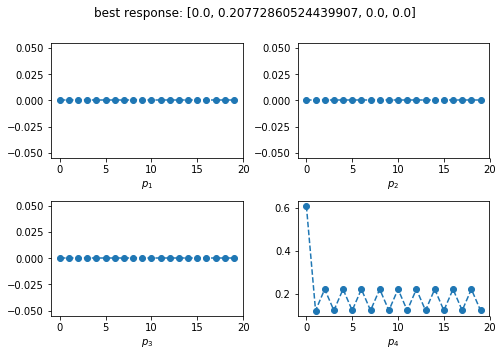

In [37]:
for hist, best in zip(histories_two, best_ev_responses):
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    fig.suptitle("best response: {}".format(best))
    for i in range(4):
        ax[int(i / 2), i % 2].plot(points[i], linestyle="--", marker="o")
        ax[int(i / 2), i % 2].set_xlabel(r"$p_{}$".format(i + 1))
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)


**Examples with new starting current: more optimal**

In [136]:
best_ev_responses_opt, histories_opt = [], []
for seed in tqdm.tqdm(range(5)):
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

    best_ev_response, hist = opt_mo.find_evolutionary_best_response(
        random_opponents, opt_mo.memory_one_best_response
    )
    best_ev_responses_opt.append(best_ev_response), histories_opt.append(hist)


 40%|████      | 2/5 [00:46<01:12, 24.12s/it]

Note history is at: 10 iterations.
Note history is at: 20 iterations.


 60%|██████    | 3/5 [03:27<02:10, 65.06s/it]/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/skopt/optimizer/optimizer.py:399: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
100%|██████████| 5/5 [04:19<00:00, 45.55s/it]


In [137]:
best_ev_responses_opt


[[0.9999, 0.0, 0.0, 0.0],
 [0.0, 0.22304970528641924, 0.0, 0.0],
 [0.4495895347906947, 0.7296616506201477, 0.0, 0.0],
 [0.0, 0.30877231062881216, 0.0, 0.0],
 [0.0, 0.20772860524439907, 0.0, 0.0]]

In [57]:
best_ev_responses


[[0.9999, 0.0, 0.0, 0.0],
 [0.0, 0.22304987289912773, 0.0, 0.0],
 [0.4495895347906947, 0.7296616506201477, 0.0, 0.0],
 [0.0, 0.3087723515944657, 0.0, 0.0],
 [0.0, 0.20772860524439907, 0.0, 0.0]]